# Importing all the necessary libraries

In [118]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torchtext.legacy import data
import numpy as np
import seaborn as sns

# Exploratory data analysis

In [119]:
df = pd.read_csv('IMDB Dataset.csv')

In [120]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [121]:
print(df.shape)

(50000, 2)


In [122]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [123]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [124]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


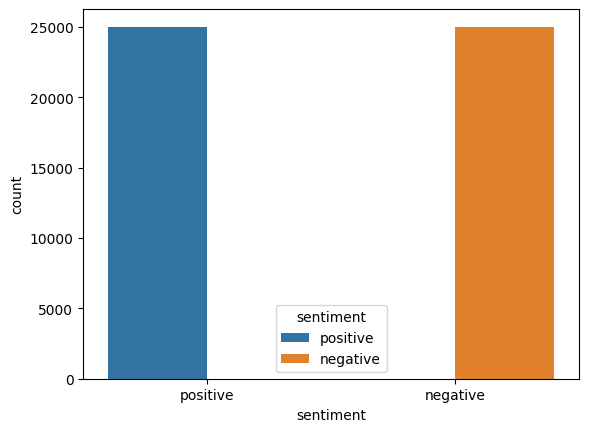

In [127]:
sns.countplot(x='sentiment', hue='sentiment', data=df)
plt.show()

In [130]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

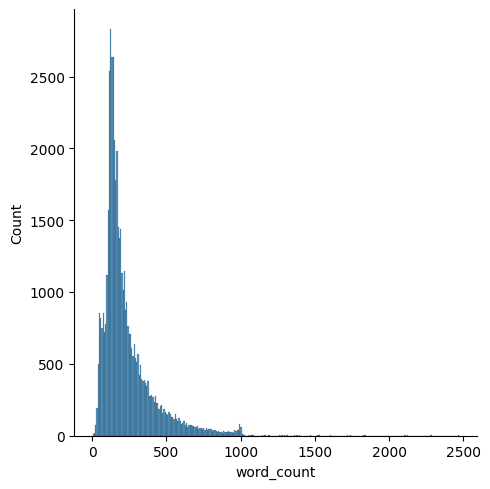

In [132]:
# Visualize the distribution of word counts
sns.displot(df['word_count'])
plt.show()

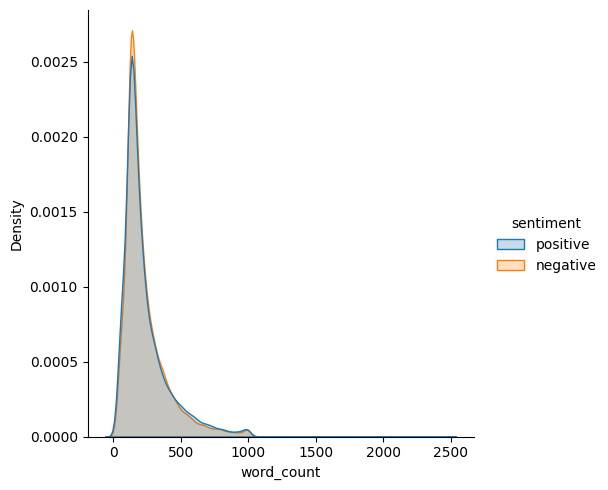

In [133]:
# Visualize the distribution of word counts by sentiment
sns.displot(df, x='word_count', hue='sentiment', kind='kde', fill=True)
plt.show()

In [134]:
# Get more information about the distribution of word counts
print(df.groupby('sentiment')['word_count'].describe())


             count       mean         std   min    25%    50%    75%     max
sentiment                                                                   
negative   25000.0  229.46456  164.947795   4.0  128.0  174.0  278.0  1522.0
positive   25000.0  232.84932  177.497046  10.0  125.0  172.0  284.0  2470.0


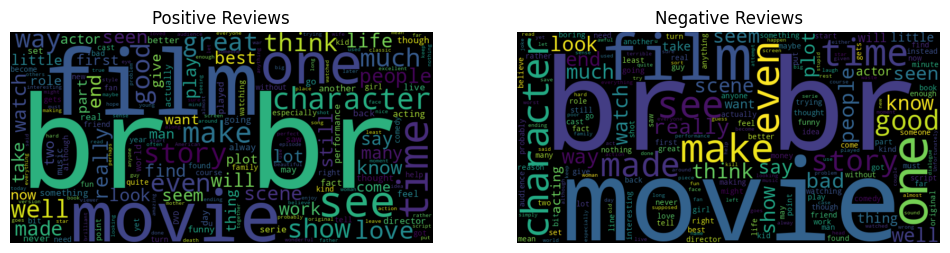

In [136]:
from wordcloud import WordCloud

positive_reviews = df[df['sentiment'] == 'positive']['review']
negative_reviews = df[df['sentiment'] == 'negative']['review']

wordcloud_positive = WordCloud(width=800, height=400).generate(' '.join(positive_reviews))
wordcloud_negative = WordCloud(width=800, height=400).generate(' '.join(negative_reviews))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()

# Approach 1: Using RNNs, Best Accuracy ~ 50%

## Defining the Fields

In [2]:
TEXT = data.Field(tokenize='spacy', tokenizer_language='en_core_web_sm')
LABEL = data.LabelField(dtype= torch.float)

2023-06-20 12:50:38.920885: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 12:50:40.505269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-20 12:50:40.526850: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-06-20 12:50:40.526886: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.

In [3]:
fields = [('t', TEXT), ('l', LABEL)]

## Loading the dataset into data1

In [4]:
data1 = data.TabularDataset.splits(
                                        path = '',
                                        train = 'IMDB Dataset.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

## Splitting the dataset into train, test and validation set

In [5]:
train_data, test_data = data1[0].split(split_ratio=0.6)

In [6]:
train_data, valid_data = train_data.split(split_ratio=0.8)

In [7]:
len(train_data), len(valid_data),len(test_data)

(24000, 6000, 20000)

In [8]:
print(vars(train_data[1]))

{'t': ['This', 'film', 'grabbed', 'me', 'right', 'from', 'its', 'start', ',', 'where', 'a', 'sweet', '-', 'looking', 'teen', '-', 'aged', 'girl', 'is', 'shown', 'visiting', 'a', 'grave', 'alone', ',', 'then', 'Elton', 'John', "'s", 'powerful', 'song', '"', 'Friends', '"', 'starts', 'playing', 'while', 'she', "'s", 'shown', 'walking', 'alone', 'through', 'the', 'streets', 'of', 'Paris', ',', 'carrying', 'a', 'suitcase', ',', 'naively', 'unaware', 'of', 'the', 'car', 'theft', 'and', 'prostitution', 'going', 'on', 'around', 'her', '.', 'The', 'entire', 'film', 'is', 'a', 'beautiful', ',', 'dreamy', ',', 'romantic', 'collection', 'of', 'scenes', 'of', 'young', 'love', ',', 'holding', 'hands', ',', 'living', 'in', 'the', 'country', ',', 'wild', 'horses', 'running', 'around', 'freely', ',', 'fields', 'of', 'wildflowers', ',', 'sunsets', ',', 'toasts', 'of', 'wine', ',', 'evenings', 'by', 'the', 'fireside', ',', 'having', 'fun', ',', 'and', 'general', 'innocence', ',', 'all', 'set', 'to', 'ro

In [9]:
print(train_data[0].t)

['I', 'just', 'took', 'my', '11', 'year', 'old', 'daughter', 'and', '8', 'year', 'old', 'son', 'to', 'this', 'movie', 'and', 'I', 'ca', "n't", 'remember', 'a', 'movie', 'where', 'I', 'laughed', 'SO', 'hard', '--', 'literal', 'out', 'loud', ',', 'deep', 'bursts', 'of', 'laughter', 'because', 'this', 'movie', 'is', 'hilarious', '.', 'Granted', 'the', 'story', 'line', 'is', 'predictable', 'but', 'the', 'ride', 'is', 'so', 'extremely', 'enjoyable', 'it', 'does', "n't", 'matter', 'that', 'you', 'know', 'how', 'it', "'s", 'going', 'to', 'end', '.', 'The', 'actors', "'", 'comedic', 'senses', 'of', 'timing', 'were', 'impeccable', '.', 'The', 'actors', 'were', 'perfectly', 'cast', '.', 'My', 'children', 'mentioned', 'that', 'Amanda', 'Bynes', 'seems', 'to', 'be', 'the', 'last', 'of', 'the', 'young', 'women', 'actresses', 'who', 'are', "n't", 'ruining', 'their', 'lives', '.', 'She', 'is', 'so', 'refreshing', '.', 'My', 'children', 'said', 'this', 'is', 'now', 'their', 'favorite', 'movie', 'of', 

## Building  the word embedding

In [10]:
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data, max_size = MAX_VOCAB_SIZE)
LABEL.build_vocab(train_data)

In [11]:
# check vocab size
print(len(TEXT.vocab))
print(len(LABEL.vocab))

25002
2


In [12]:
print(TEXT.vocab.freqs.most_common(20))

[('the', 276094), (',', 261454), ('.', 225595), ('and', 148534), ('a', 148229), ('of', 137300), ('to', 126985), ('is', 103290), ('in', 83450), ('I', 75138), ('it', 73267), ('that', 66751), ('"', 60980), ("'s", 58932), ('this', 57671), ('-', 50624), ('/><br', 48924), ('was', 47777), ('as', 41183), ('with', 40803)]


In [13]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7fd9ff809bb0>>, {'<unk>': 0, '<pad>': 1, 'the': 2, ',': 3, '.': 4, 'and': 5, 'a': 6, 'of': 7, 'to': 8, 'is': 9, 'in': 10, 'I': 11, 'it': 12, 'that': 13, '"': 14, "'s": 15, 'this': 16, '-': 17, '/><br': 18, 'was': 19, 'as': 20, 'with': 21, 'movie': 22, 'for': 23, 'film': 24, 'The': 25, 'but': 26, "n't": 27, 'on': 28, '(': 29, ')': 30, 'you': 31, 'are': 32, 'not': 33, 'have': 34, 'his': 35, 'be': 36, 'he': 37, 'one': 38, '!': 39, 'at': 40, 'by': 41, 'all': 42, 'an': 43, 'who': 44, 'they': 45, 'from': 46, 'like': 47, 'so': 48, "'": 49, 'out': 50, 'or': 51, 'her': 52, 'about': 53, 'just': 54, 'It': 55, 'has': 56, 'do': 57, '?': 58, 'some': 59, 'good': 60, 'more': 61, 'would': 62, 'very': 63, 'what': 64, 'up': 65, 'there': 66, 'This': 67, 'time': 68, 'when': 69, 'can': 70, 'if': 71, 'which': 72, 'really': 73, 'see': 74, 'only': 75, 'had': 76, 'were': 77, 'she': 78, 'their': 79, 'even': 80, 'story': 81, 

## Defining the batch size and creating a BucketIterator

In [14]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits((train_data, valid_data, test_data), sort = False, batch_size = BATCH_SIZE, device = device)

cuda


## Building the RNN Architecture

In [15]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))

        return self.fc(hidden.squeeze(0))

## Initializing an instance of the RNN model

In [16]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1

rnn_model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

## Counting the number of trainable parameters in our model

In [17]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(rnn_model):,} trainable parameters')

The model has 2,592,105 trainable parameters


## Setting the optimizer as "Adam"

In [18]:
import torch.optim as optim

optimizer = optim.Adam(rnn_model.parameters())

## Setting the loss function

In [19]:
criterion = nn.BCEWithLogitsLoss()

## Sending the model and Loss function to GPU(Device)

In [20]:
rnn_model = rnn_model.to(device)
criterion = criterion.to(device)

## Defining a function to calculate accuracy of a batch

In [21]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

## Defining training function

In [22]:
def train(model, iterator, optimizer, criterion):
    epoch_loss =0
    epoch_acc = 0

    model.train()

    for batch in iterator:
        optimizer.zero_grad()
        predictions = model(batch.t).squeeze(1)
        loss = criterion(predictions, batch.l)
        acc = binary_accuracy(predictions, batch.l)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

## Defining Evaluate Function

In [23]:
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():
        for batch in iterator:
            predictions = model(batch.t).squeeze(1)
            loss = criterion(predictions, batch.l)
            acc = binary_accuracy(predictions, batch.l)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

## Defining function to calculate execution time

In [24]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time-(elapsed_mins * 60))    
    return elapsed_mins, elapsed_secs


## Training the model

In [25]:
N_EPOCHS = 5

best_valid_loss = float('inf')

rnn_train_loss = []
rnn_train_acc = []
rnn_valid_loss = []
rnn_valid_acc = []


for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss, train_acc = train(rnn_model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(rnn_model, valid_iterator, criterion)
    
    end_time = time.time()

    # append train loss and train accuracy
    rnn_train_loss.append(train_loss)
    rnn_train_acc.append(train_acc)
    rnn_valid_acc.append(valid_acc)
    rnn_valid_loss.append(valid_loss)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(rnn_model.state_dict(), 'RNN_model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 41s
	Train Loss: 0.703 | Train Acc: 50.60%
	Valid Loss: 0.702 | Valid Acc: 49.89%
Epoch: 02 | Epoch Time: 0m 44s
	Train Loss: 0.698 | Train Acc: 49.92%
	Valid Loss: 0.696 | Valid Acc: 49.86%
Epoch: 03 | Epoch Time: 0m 46s
	Train Loss: 0.697 | Train Acc: 49.93%
	Valid Loss: 0.696 | Valid Acc: 49.56%
Epoch: 04 | Epoch Time: 0m 47s
	Train Loss: 0.698 | Train Acc: 50.26%
	Valid Loss: 0.697 | Valid Acc: 49.51%
Epoch: 05 | Epoch Time: 0m 46s
	Train Loss: 0.697 | Train Acc: 50.12%
	Valid Loss: 0.693 | Valid Acc: 50.99%


## Checking the Test loss

In [26]:
rnn_model.load_state_dict(torch.load('RNN_model.pt'))
test_loss, test_acc = evaluate(rnn_model, test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.693 | Test Acc: 50.38%


## Testing out the model using custom input

In [27]:
import spacy
nlp = spacy.load('en_core_web_sm')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    prediction = torch.sigmoid(model(tensor))
    return prediction.item()

In [28]:
predict_sentiment(rnn_model, "This film is terrible")

0.5097026824951172

# Approach 2: Using LSTMs, Best Accuracy ~ 90%

## Setting the Fields

In [79]:
TEXT = data.Field(tokenize='spacy', tokenizer_language= 'en_core_web_sm', include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [80]:
fields = [('t', TEXT), ('l', LABEL)]

## Loading the dataset into data1

In [81]:
data1 = data.TabularDataset.splits(
                                        path = '',
                                        train = 'IMDB Dataset.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

## Splitting the data into train, validation and test sets

In [82]:
train_data, test_data = data1[0].split(split_ratio=0.6)

In [83]:
train_data, valid_data = train_data.split(split_ratio=0.8)

In [84]:
len(train_data), len(valid_data),len(test_data)

(24000, 6000, 20000)

## Building the vocab

In [85]:
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data,
                 max_size = MAX_VOCAB_SIZE,
                 vectors = "glove.6B.100d",
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

## Building the iterator

In [86]:
BATCH_SIZE = 64

device = torch.device('cuda'if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    sort_key = lambda x: len(x.t),
    device = device
)

## Building the architecture

In [87]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers,
                           bidirectional=bidirectional, dropout=dropout)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, text, text_lengths):

        embedded = self.dropout(self.embedding(text))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        return self.fc(hidden.squeeze(0))

## Defining the model parameters and creating an instance of the RNN Class

In [112]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256    
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

lstm_model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS,
            BIDIRECTIONAL, DROPOUT, PAD_IDX)

## Function to count number of trainable parameters in our model

In [113]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(lstm_model):,} trainable parameters')

The model has 7,515,857 trainable parameters


## Copying the pretrained word embedding to our model

In [114]:
pretrained_embeddings = TEXT.vocab.vectors
print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [115]:
lstm_model.embedding.weight.data.copy_(pretrained_embeddings)

RuntimeError: The size of tensor a (200) must match the size of tensor b (100) at non-singleton dimension 1

## Setting the  word embedding of the "unknown" and "pad" token to be all zeros to make sure our model ignores these tokens

In [116]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

lstm_model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
lstm_model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(lstm_model.embedding.weight.data[PAD_IDX])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])


## Setting the optimizer to Adam

In [105]:
import torch.optim as optim

optimizer = optim.Adam(lstm_model.parameters())

## Setting the loss function and sending both the model and loss function to GPU(Device)

In [106]:
criterion = nn.BCEWithLogitsLoss()

lstm_model = lstm_model.to(device)
criterion = criterion.to(device)

## Define function to calculate accuracy for a batch

In [107]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

## Define train function

In [108]:
def train(model, iterator, optimizer, criterion):

    epoch_loss=0
    epoch_acc=0

    model.train()

    for batch in iterator:
        optimizer.zero_grad()
        text, text_lengths = batch.t
        predictions = model(text, text_lengths).squeeze(1)
        loss = criterion(predictions, batch.l)
        acc = binary_accuracy(predictions, batch.l)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    return epoch_loss/len(iterator), epoch_acc / len(iterator)

## Define evaluate function

In [109]:
def evaluate(model, iterator, criterion):
    epoch_loss=0
    epoch_acc=0

    model.eval()

    with torch.no_grad():

        for batch in iterator:
            text, text_lengths = batch.t
            predictions = model(text, text_lengths).squeeze(1)
            loss = criterion(predictions, batch.l)
            acc = binary_accuracy(predictions, batch.l)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    
    return epoch_loss/len(iterator), epoch_acc / len(iterator)

## Define function to evaluate the epoch training time

In [110]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time/60)
    elapsed_secs = int(elapsed_time-(elapsed_mins*60))
    return elapsed_mins, elapsed_secs

## Training the model

In [111]:
N_EPOCHS = 5
best_valid_loss = float('inf')

lstm_train_loss = []
lstm_train_acc = []

lstm_valid_loss = []
lstm_valid_acc = []

for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss, train_acc = train(lstm_model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(lstm_model, valid_iterator, criterion)

    end_time = time.time()
    # Append
    lstm_train_loss.append(train_loss)
    lstm_train_acc.append(train_acc)
    lstm_valid_loss.append(valid_loss)
    lstm_valid_acc.append(valid_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(lstm_model.state_dict(), 'LSTM_model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 1m 47s
	Train Loss: 0.668 | Train Acc: 59.28%
	Valid Loss: 0.692 | Valid Acc: 50.80%
Epoch: 02 | Epoch Time: 1m 59s
	Train Loss: 0.672 | Train Acc: 58.21%
	Valid Loss: 0.649 | Valid Acc: 61.82%
Epoch: 03 | Epoch Time: 2m 5s
	Train Loss: 0.638 | Train Acc: 62.60%
	Valid Loss: 0.584 | Valid Acc: 69.29%
Epoch: 04 | Epoch Time: 2m 10s
	Train Loss: 0.497 | Train Acc: 75.46%
	Valid Loss: 0.345 | Valid Acc: 85.06%
Epoch: 05 | Epoch Time: 2m 34s
	Train Loss: 0.306 | Train Acc: 87.33%
	Valid Loss: 0.264 | Valid Acc: 89.68%


## Checking the test loss

In [50]:
lstm_model.load_state_dict(torch.load('LSTM_model.pt'))

test_loss, test_acc = evaluate(lstm_model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.259 | Test Acc: 89.97%


## Using custom input on our mdoel

In [51]:
import spacy
nlp = spacy.load('en_core_web_sm')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    prediction = torch.sigmoid(model(tensor, length_tensor))
    return prediction.item()

In [52]:
predict_sentiment(lstm_model, "This film is terrible")

0.004397955257445574

# Analysis of the results

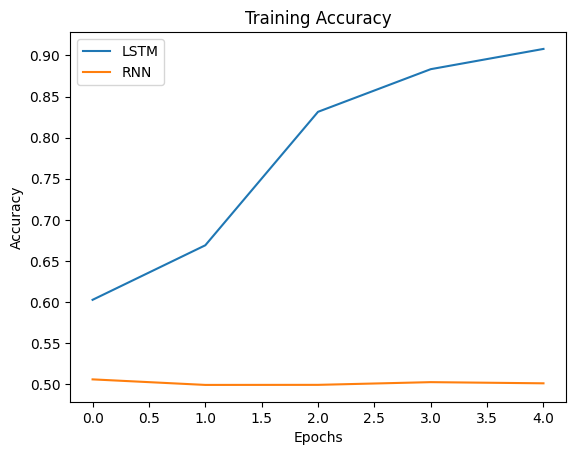

In [53]:
# Plot the training accuracies of the RNN and LSTM models

plt.plot(lstm_train_acc, label='LSTM')
plt.plot(rnn_train_acc, label='RNN')
plt.legend()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

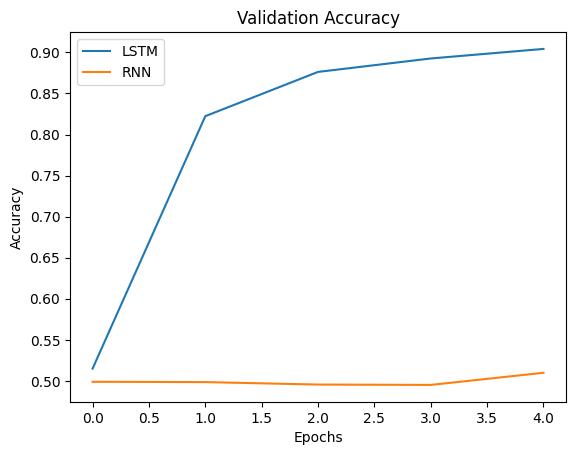

In [54]:
# Plot the validation accuracies of the RNN and LSTM models

plt.plot(lstm_valid_acc, label='LSTM')
plt.plot(rnn_valid_acc, label='RNN')
plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

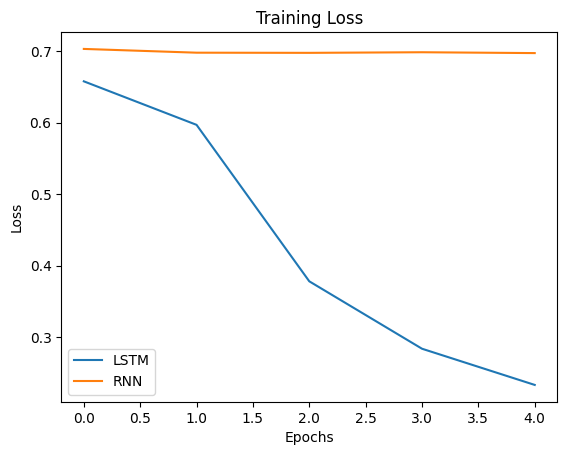

In [55]:
# Plot the training losses of the RNN and LSTM models

plt.plot(lstm_train_loss, label='LSTM') 
plt.plot(rnn_train_loss, label='RNN')
plt.legend()
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

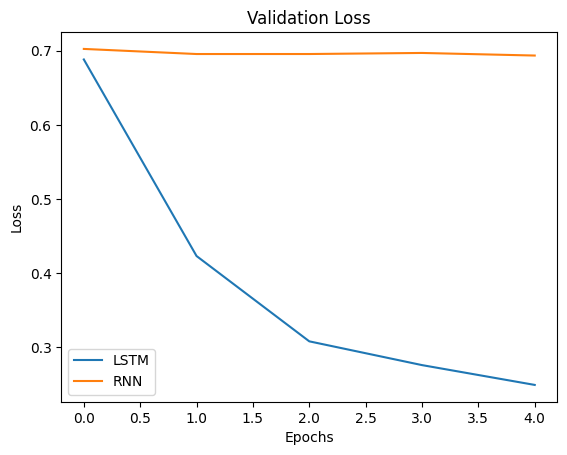

In [56]:
# Plot the validation losses of the RNN and LSTM models

plt.plot(lstm_valid_loss, label='LSTM')
plt.plot(rnn_valid_loss, label='RNN')
plt.legend()
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


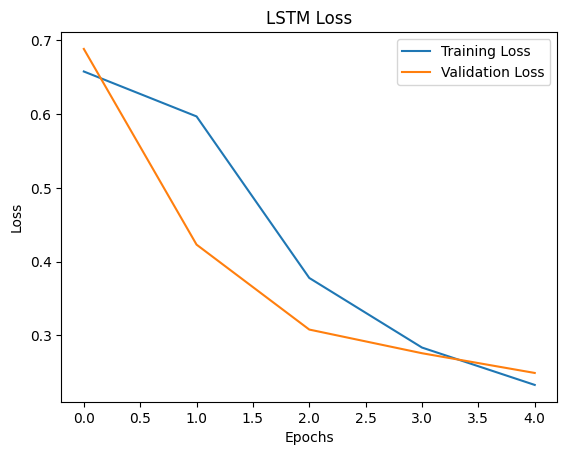

In [57]:
# Plot the training and validation losses of the LSTM model

plt.plot(lstm_train_loss, label='Training Loss')
plt.plot(lstm_valid_loss, label='Validation Loss')
plt.legend()
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


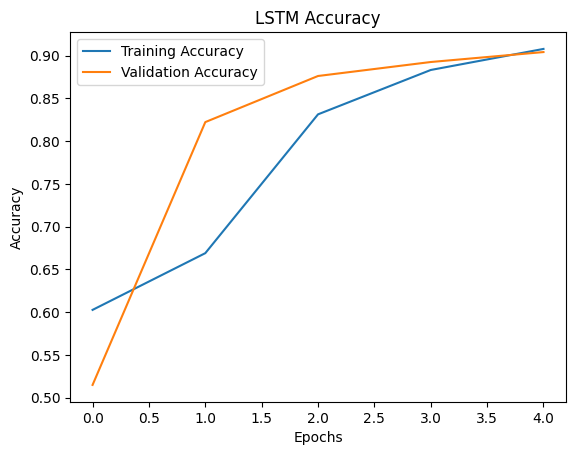

In [58]:
# Plot the training and validation accuracies of the LSTM model

plt.plot(lstm_train_acc, label='Training Accuracy')
plt.plot(lstm_valid_acc, label='Validation Accuracy')
plt.legend()
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


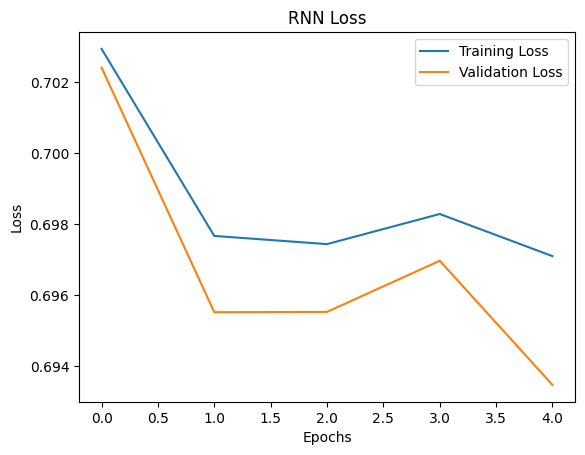

In [59]:
# Plot the training and validation losses of the RNN model

plt.plot(rnn_train_loss, label='Training Loss')
plt.plot(rnn_valid_loss, label='Validation Loss')
plt.legend()
plt.title('RNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


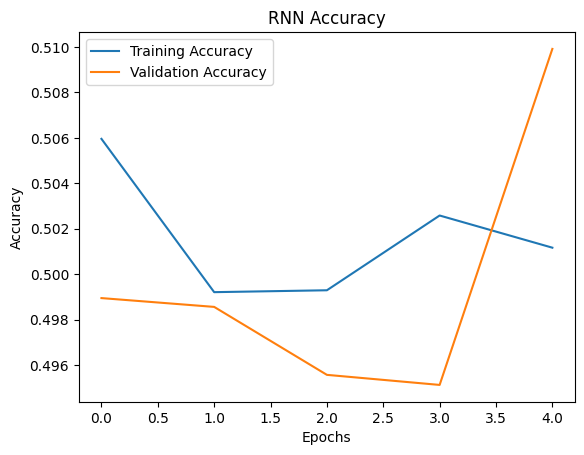

In [60]:
# Plot the training and validation accuracies of the RNN model

plt.plot(rnn_train_acc, label='Training Accuracy')
plt.plot(rnn_valid_acc, label='Validation Accuracy')
plt.legend()
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
